In [ ]:
import os

# Install ollama
!curl https://ollama.ai/install.sh | sh

# Starting ollama daemon in background
os.system("nohup ollama serve > /dev/null 2>&1 &")

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 13269    0 13269    0     0  60231      0 --:--:-- --:--:-- --:--:-- 60313
>>> Installing ollama to /usr/local
>>> Downloading Linux amd64 bundle
############################################################################################# 100.0%
>>> Creating ollama user...
>>> Adding ollama user to video group...
>>> Adding current user to ollama group...
>>> Creating ollama systemd service...
>>> The Ollama API is now available at 127.0.0.1:11434.
>>> Install complete. Run "ollama" from the command line.


0

In [ ]:
!pip install ollama

In [ ]:
import ollama

ollama.pull("llava:v1.6")

ProgressResponse(status='success', completed=None, total=None, digest=None)

In [ ]:
from PIL import Image

try:
        img = Image.open("/content/19-S1-A5-100k-ordered.tif")
        img.save("/content/19-S1-A5-100k-ordered.jpg", "JPEG")  # Convert to JPEG
        image_path = "/content/19-S1-A5-100k-ordered.jpg"  # Update image path
except Exception as e:
        print(f"Error converting image: {e}")

In [ ]:
stream = ollama.generate(
            model="llava:v1.6",
            prompt='''listen CAREFULLY extract the nanometer from the image and output the result as follows

            output:10nm

            ''',
            images=["/content/19-S1-A5-100k-ordered.jpg"],
            stream=True
        )

In [ ]:
for chuncks in stream:
  print(chuncks)

model='llava:v1.6' created_at='2025-01-06T19:25:54.027866481Z' done=False done_reason=None total_duration=None load_duration=None prompt_eval_count=None prompt_eval_duration=None eval_count=None eval_duration=None response=' The' context=None
model='llava:v1.6' created_at='2025-01-06T19:25:55.62055001Z' done=False done_reason=None total_duration=None load_duration=None prompt_eval_count=None prompt_eval_duration=None eval_count=None eval_duration=None response=' nan' context=None
model='llava:v1.6' created_at='2025-01-06T19:25:56.924225851Z' done=False done_reason=None total_duration=None load_duration=None prompt_eval_count=None prompt_eval_duration=None eval_count=None eval_duration=None response='om' context=None
model='llava:v1.6' created_at='2025-01-06T19:25:58.420515103Z' done=False done_reason=None total_duration=None load_duration=None prompt_eval_count=None prompt_eval_duration=None eval_count=None eval_duration=None response='eters' context=None
model='llava:v1.6' created_at=

In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!apt-get update
!apt-get install -y tesseract-ocr
!apt-get install -y libtesseract-dev

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:6 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:9 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [61.7 kB]
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,631 kB]
Get:11 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [3,513 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd64 Packages [3,652 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-security/universe amd6

In [ ]:
import pytesseract

pytesseract.pytesseract.tesseract_cmd = "/usr/bin/tesseract"


In [ ]:
import os
from PIL import Image
import pytesseract
import re
import csv


dataset_path = "/content/drive/MyDrive/Scanning Electron Microscopy Imaging of Nanoparticles/stutcure"


output_csv = "nm_details.csv"

nm_pattern = re.compile(r"\b\d+\s?nm\b")


csv_data = [["Structure Type", "Image Name", "NM Details"]]


for subfolder in os.listdir(dataset_path):
    subfolder_path = os.path.join(dataset_path, subfolder)

    if os.path.isdir(subfolder_path):  # Ensure it's a folder
        for image_file in os.listdir(subfolder_path):
            image_path = os.path.join(subfolder_path, image_file)


            if os.path.isfile(image_path) and image_file.lower().endswith(('.png', '.jpg', '.jpeg', '.tif', '.bmp')):
                try:

                    with Image.open(image_path) as img:

                        extracted_text = pytesseract.image_to_string(img, config='--psm 6')


                        nm_details = nm_pattern.findall(extracted_text)


                        nm_details_str = ", ".join(nm_details) if nm_details else "No nm found"


                        csv_data.append([subfolder, image_file, nm_details_str])
                except Exception as e:
                    print(f"Error processing {image_path}: {e}")
                    csv_data.append([subfolder, image_file, f"Error: {e}"])


with open(output_csv, mode="w", newline="", encoding="utf-8") as file:
    writer = csv.writer(file)
    writer.writerows(csv_data)

print(f"Results written to {output_csv}")


Results written to nm_details.csv


In [ ]:
import pandas as pd

data = pd.read_csv("/content/ocr_output.csv")

import pandas as pd
import numpy as np


data.isnull().sum()

,0
Unnamed: 0,0
Structure Type,0
Image Name,0
NM Details,0


In [ ]:
data.to_csv("ocr_output.csv")

In [ ]:
from PIL import Image

def pattern_extraction(image_path):
  nm_pattern = re.compile(r"\b\d+\s?nm\b")
  with Image.open(image_path) as img:
    extracted_text=pytesseract.image_to_string(img,config='--psm 6')

    re_extraction = nm_pattern.findall(extracted_text)

    return re_extraction

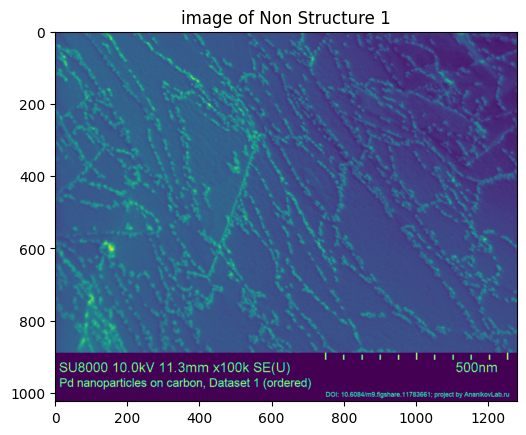


######### the extracted unit ##########



['500nm']

In [ ]:
image = Image.open("/content/drive/MyDrive/Scanning Electron Microscopy Imaging of Nanoparticles/stutcure/Non Structure/124-S1-no_area-100k-ordered.tif")

image_np = np.array(image)
import matplotlib.pyplot as plt
plt.imshow(image_np)
plt.title("image of Non Structure 1")
plt.show()

print("\n######### the extracted unit ##########\n")

pattern_extraction("/content/drive/MyDrive/Scanning Electron Microscopy Imaging of Nanoparticles/stutcure/Non Structure/124-S1-no_area-100k-ordered.tif")